In [2]:
import pandas as pd # manipulation des tableaux
import numpy as np # calcul matriciel, algebrique
import matplotlib.pyplot as plt # visualisation graphique des donnees, pyplot pour le tracage des graphiques en 2D
import seaborn as sns # manipulation des statistiques

In [3]:
import warnings # generer les erreurs et les alertes
warnings.filterwarnings("ignore") # ignorer les alertes

In [4]:
df = pd.read_csv("50_Startups.csv") #importer la base de donnée
df.shape

(50, 5)

In [5]:
df.head() #visualisation des 5 premières colonnes du tableau

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.info() #voir les informations de la base de donnee

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe() #afficher les variables quantitatives

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

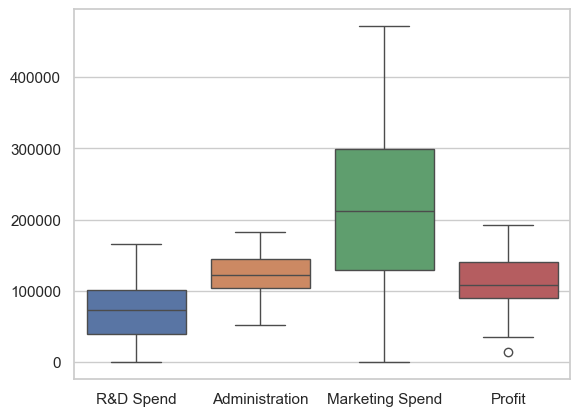

In [11]:
sns.set(style='whitegrid')
sns.boxplot(data=df)
plt.show()

In [13]:
print(df.loc[df['Profit'] == 14681.4])

    R&D Spend  Administration  Marketing Spend       State   Profit
49        0.0        116983.8         45173.06  California  14681.4


In [14]:
print(df.loc[df["R&D Spend"] == 0])

    R&D Spend  Administration  Marketing Spend       State    Profit
47        0.0       135426.92             0.00  California  42559.73
49        0.0       116983.80         45173.06  California  14681.40


In [16]:
quantile_005 = df['Profit'].quantile(0.05)
print("Le quantile d'ordre 0.05 pour la variable 'profit' est : ", quantile_005)


Le quantile d'ordre 0.05 pour la variable 'profit' est :  45678.689000000006


Text(0, 0.5, 'Profit')

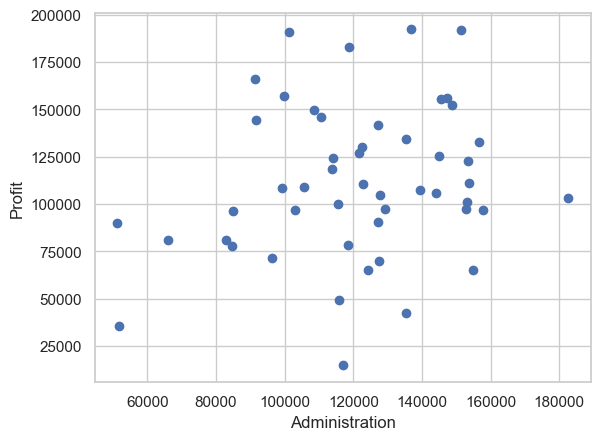

In [19]:
plt.scatter(x=df.Administration, y=df.Profit)
plt.xlabel('Administration')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

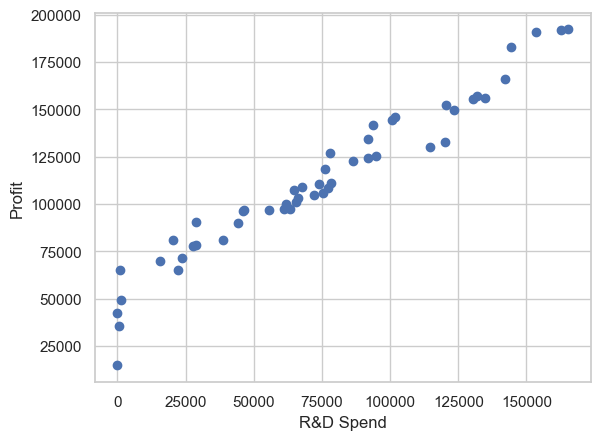

In [21]:
plt.scatter(x=df['R&D Spend'], y=df['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

Text(0.5, 0, 'Profit')

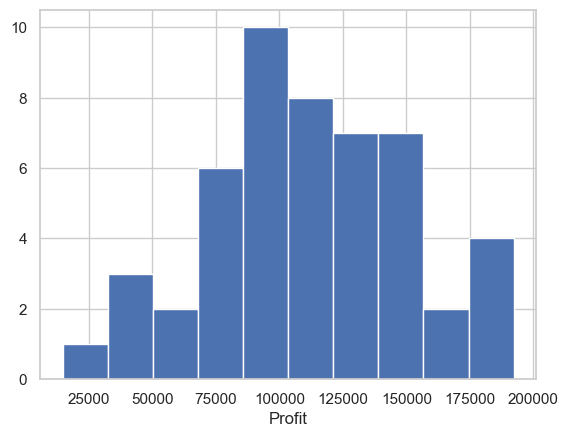

In [23]:
plt.hist(df['Profit'])
plt.xlabel("Profit")

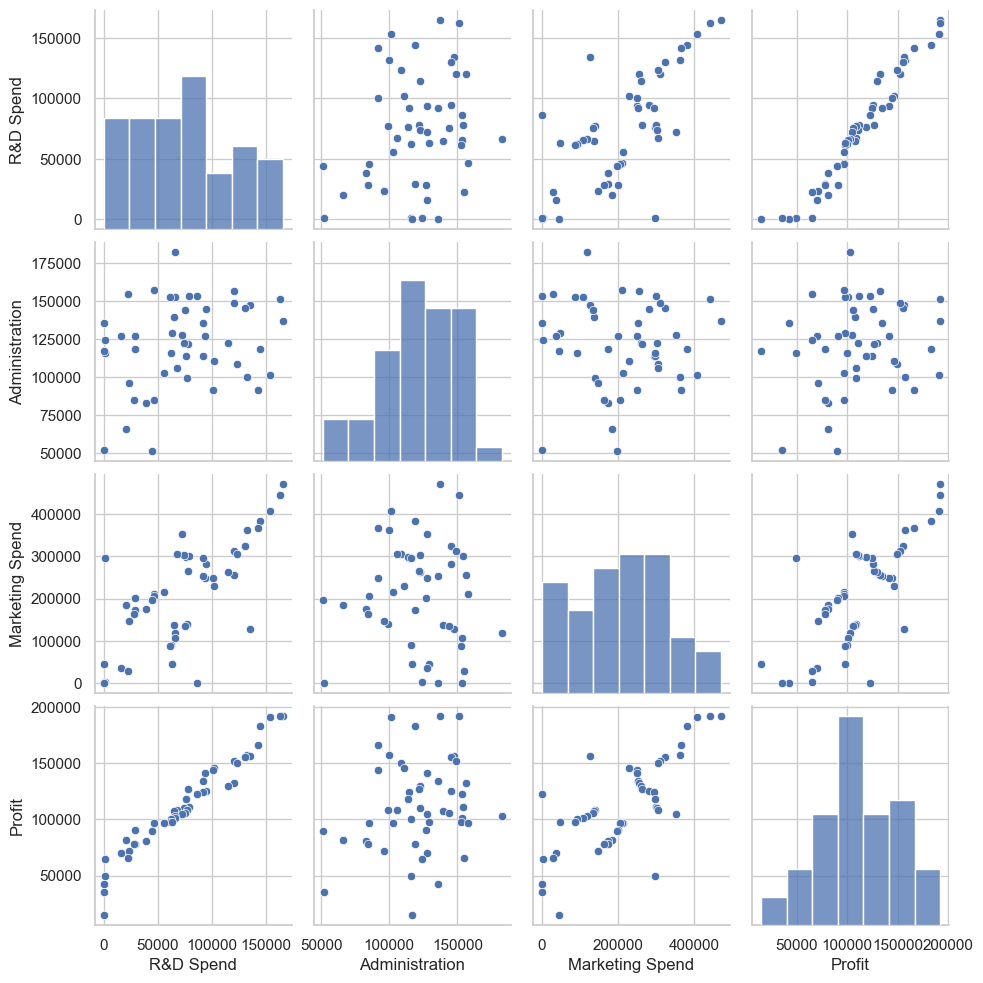

In [24]:
sns.pairplot(df)

<Axes: >

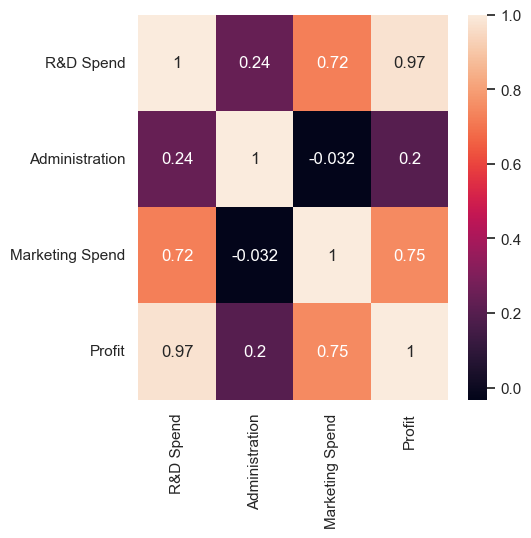

In [28]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
correlations = numerical_columns.corr(method = 'pearson')
plt.figure(figsize = (5, 5))
sns.heatmap(correlations, annot = True)

In [48]:
x = df.iloc[:, 0:4].values
y = df.iloc[:,4].values

In [49]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
x[:,3]=label.fit_transform(x[:,3])

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('state',OneHotEncoder(),[3])],remainder='passthrough')
x=ct.fit_transform(x)


In [51]:
x[0:5,:]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape


(40, 6)

In [85]:
from sklearn.linear_model import LinearRegression
reggresser=LinearRegression()
reggresser.fit(x_train,y_train)

LinearRegression()

In [86]:
reggresser.coef_

array([ 8.66383692e+01, -8.72645791e+02,  7.86007422e+02,  7.73467193e-01,
        3.28845975e-02,  3.66100259e-02])

In [87]:
reggresser.intercept_

42467.5292485298

In [105]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

print("y_test et y_pred_train")

for i in range(10):
    print([y_test[i],y_pred_train[i]])

print("y_test et y_pred")
for i in range(10):
    print([y_test[i],y_pred[i]])

y_test et y_pred_train
[103282.38, 95764.4232049669]
[144259.4, 89164.62849777439]
[146121.95, 109506.72329085175]
[77798.83, 91366.218894112]
[191050.39, 127111.48666646771]
[105008.31, 159019.04337114177]
[81229.06, 148905.98812540615]
[97483.56, 48179.60744028044]
[110352.25, 45374.3472250672]
[166187.94, 102951.95967979112]
y_test et y_pred
[103282.38, 103015.20159796409]
[144259.4, 132582.27760814587]
[146121.95, 132447.73845174216]
[77798.83, 71976.09851258434]
[191050.39, 178537.4822105553]
[105008.31, 116161.24230167214]
[81229.06, 67851.6920967623]
[97483.56, 98791.73374686911]
[110352.25, 113969.43533013972]
[166187.94, 167921.06569550544]


In [89]:
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
MSE = mean_squared_error(y_test,y_pred)
print('MSE: {}'.format(MSE))

MSE: 83502864.03263049


In [91]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE: {}'.format(RMSE))

RMSE: 9137.99015279785


In [92]:
R2=r2_score(y_test,y_pred)
print('R2: {}' .format(R2))

R2: 0.934706847328201


In [93]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [94]:
ridge.coef_

array([ 7.36617063e+01, -7.95561413e+02,  7.21899706e+02,  7.73914292e-01,
        3.25904211e-02,  3.64458070e-02])

In [95]:
ridge.intercept_

42513.34008028665

In [96]:
y_pred1 = ridge.predict(x_test)
for i in range(10):
    print([y_test[i],y_pred1[i]])

[103282.38, 103094.49622894045]
[144259.4, 132592.10676653305]
[146121.95, 132546.03222418355]
[77798.83, 72059.53552639652]
[191050.39, 178632.23587039084]
[105008.31, 116079.5705089603]
[81229.06, 67792.61549940443]
[97483.56, 98741.36250728574]
[110352.25, 114039.48293662987]
[166187.94, 168020.47997002138]


In [97]:
MSE_ridge = mean_squared_error(y_test,y_pred1)
print('MSE: {}'.format(MSE))

RMSE_ridge = np.sqrt(mean_squared_error(y_test,y_pred1))
print('RMSE: {}'.format(RMSE))

R2_ridge = r2_score(y_test,y_pred1)
print('R2: {}' .format(R2))

MSE: 83502864.03263049
RMSE: 9137.99015279785
R2: 0.934706847328201
